# Project 2: Ames House Price Prediction
---

## Problem Statement
---

Wether you are seller, buyer or real-estate agents, housing prices are dependent on so many factors. The question is how can we determine which factors (features) that have strong influence on the housing sale price. Using the Ames(IA) dataset, the goal of this project is to create a regression model that is able to predict accurately on the sale price of each house in Ames(IA).  

## Executive Summary
---

### Contents:

- Importing the Libraries
- Importing Training and Testing dataset
- Data Cleaning
- Experimental Data Analysis (EDA)
- Feature Engineering
- Pre-processing and prediction of data
- Model selection and evaluation
- Conclusion

## Data Dictionary
---

The data dictionary may be found at below: 
- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

## Load Data

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
#display train dataframe
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#display test dataframe
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
#rename columns
train = train.rename(columns = str.lower)
test = test.rename(columns = str.lower)
#replace space to '_'
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

In [5]:
#check
print(f'train : {train.columns[:5]}')
print(f'test : {test.columns[:5]}')

train : Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')
test : Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')


## Data Cleaning & EDA

In [6]:
#shape
print(f'train : {train.shape}')
print(f'test : {test.shape}')

train : (2051, 81)
test : (878, 80)


In [7]:
#train data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
#test data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

**Comments:** To create new features first before dealing with the missing data 

**Features to add:** <br>
(I will use year sold as the base to calculate the age)
1. age of the house 
2. age of remodel
3. age of garage

In [9]:
#create features for train data set
train['age_home'] = train['yr_sold'] - train['year_built']
train['age_remodel'] = train['yr_sold'] - train['year_remod/add']
train['age_garage'] = train['yr_sold'] - train['garage_yr_blt']

In [10]:
#create features for test data set
test['age_home'] = test['yr_sold'] - test['year_built']
test['age_remodel'] = test['yr_sold'] - test['year_remod/add']
test['age_garage'] = test['yr_sold'] - test['garage_yr_blt']

Let's take a look at the correlation against the saleprice

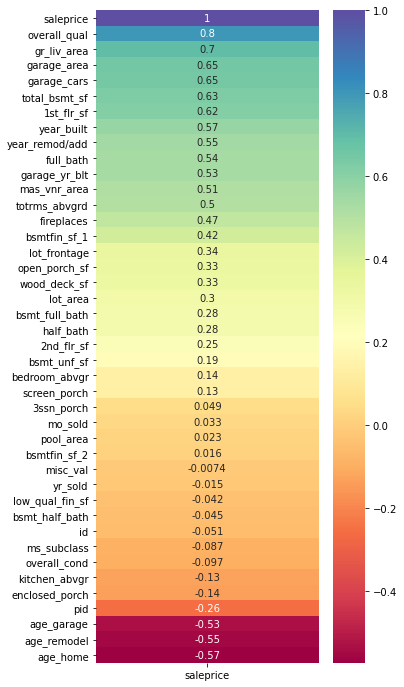

In [11]:
plt.figure(figsize= (5,12))
sns.heatmap(train.corr()[['saleprice']].sort_values(by= 'saleprice',ascending=False), annot = True, cmap = "Spectral")
plt.show()

**Comment:** I will remove features that has low correlation with reference tosaleprice (< 0.3 and > -0.3)

In [12]:
#to convert test['id'] to a dataframe as i will need it for prediction of saleprice later
test_id = test['id'].to_frame()

In [13]:
#to remove low correlation with reference to saleprice
train.drop(columns = ['bsmt_full_bath',
                      'half_bath',
                      '2nd_flr_sf',
                      'bsmt_unf_sf', 
                      'bedroom_abvgr', 
                      'screen_porch', 
                      '3ssn_porch', 
                      'mo_sold', 
                      'pool_area', 
                      'bsmtfin_sf_2', 
                      'misc_val', 
                      'yr_sold', 
                      'low_qual_fin_sf', 
                      'bsmt_half_bath',
                      'ms_subclass', 
                      'overall_cond', 
                      'kitchen_abvgr', 
                      'enclosed_porch',
                      'id',
                      'pid'], inplace = True)

In [14]:
#to remove low correlation with reference to saleprice
test.drop(columns = [ 'bsmt_full_bath',
                      'half_bath',
                      '2nd_flr_sf',
                      'bsmt_unf_sf', 
                      'bedroom_abvgr', 
                      'screen_porch', 
                      '3ssn_porch', 
                      'mo_sold', 
                      'pool_area', 
                      'bsmtfin_sf_2', 
                      'misc_val', 
                      'yr_sold', 
                      'low_qual_fin_sf', 
                      'bsmt_half_bath',
                      'ms_subclass', 
                      'overall_cond', 
                      'kitchen_abvgr', 
                      'enclosed_porch',
                      'id',
                      'pid'], inplace = True)

Further explore on the heatmap for **numerical features**

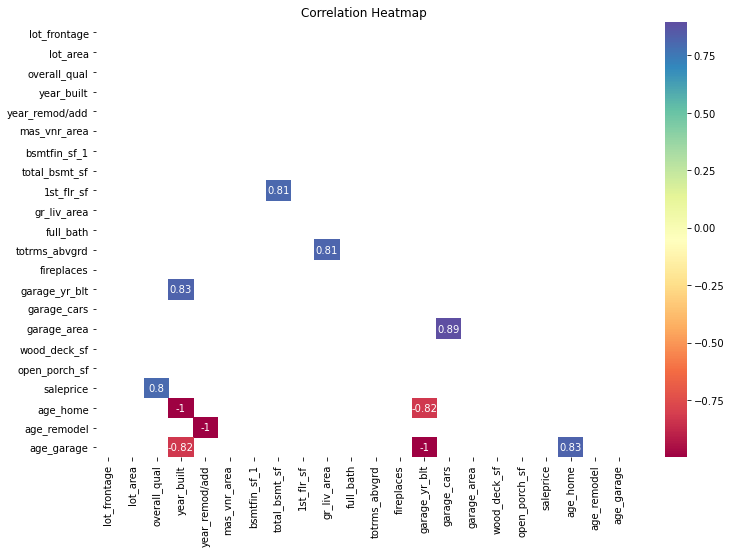

In [15]:
#heatmap
mask = np.zeros_like(train.corr()[abs(train.corr()) >= 0.8])
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize= (12,8))
sns.heatmap(train.corr()[abs(train.corr()) >= 0.8], annot= True, cmap = "Spectral", mask = mask)
title = plt.title('Correlation Heatmap')
plt.show()

**Comment:** Multicollinearity is found in the training data which may cause negative impact on the predicition model. Below features that are highly correlated:
1. year_built vs age_garage
2. year_built vs age_home
3. year_built vs garage_yr_blt
4. year_remod/add vs age_remodel
5. total_bsmt_sf vs 1st_flr_sf
6. gr_liv_area vs totrms_abvgrd
7. garage_yr_blt vs age_garage
8. garage_yr_blt vs age_home
9. garage_cars vs garage_area
10. age_home vs age_garage

Hence, i will remove each feature from the pair that has lower correlation with saleprice.

In [16]:
#remove from train data set
train.drop(columns = ['year_built',
                     'year_remod/add',
                     '1st_flr_sf',
                     'totrms_abvgrd',
                     'garage_yr_blt',
                     'garage_cars',
                     'age_garage'], inplace = True)

In [17]:
#remove from test data set
test.drop(columns = ['year_built',
                     'year_remod/add',
                     '1st_flr_sf',
                     'totrms_abvgrd',
                     'garage_yr_blt',
                     'garage_cars',
                     'age_garage'], inplace = True)

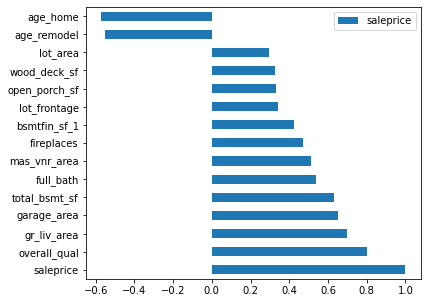

In [18]:
#Remaining features
train.corr()[['saleprice']].sort_values(by= 'saleprice',ascending=False).plot(kind= 'barh', figsize=(6,5));

In [19]:
print(train.shape)
print(test.shape)

(2051, 57)
(878, 56)


Now i will tackle on the **missing values**.

In [20]:
#to check on the sum of null values in train data set
train.isna().sum().sort_values(ascending=False).head(25)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
garage_area          1
total_bsmt_sf        1
bsmtfin_sf_1         1
wood_deck_sf         0
age_home             0
saleprice            0
sale_type            0
open_porch_sf        0
dtype: int64

Clean train data set

In [21]:
#pool qc, no pool = 'none'
train['pool_qc'].fillna('None', inplace= True)

#no misc feature = 'none'
train['misc_feature'].fillna('None', inplace= True)

#no alley = 'none'
train['alley'].fillna('None', inplace= True)

#no fence = 'none'
train['fence'].fillna('None', inplace= True)

#fireplace qu, no fireplace = 'none'
train['fireplace_qu'].fillna('None', inplace= True)

#assuming every house has a frontage, i will apply mean to the missing value
train['lot_frontage'].fillna(train['lot_frontage'].mean(), inplace= True)

#no garage = 'none'
train['garage_finish'].fillna('None', inplace= True)
train['garage_qual'].fillna('None', inplace = True)
train['garage_cond'].fillna('None', inplace = True)
train['garage_type'].fillna('None', inplace = True)

#no bsmt = 'none'
train['bsmt_exposure'].fillna('None', inplace= True)
train['bsmtfin_type_2'].fillna('None', inplace= True)
train['bsmtfin_type_1'].fillna('None', inplace= True)
train['bsmt_cond'].fillna('None', inplace= True)
train['bsmt_qual'].fillna('None', inplace= True)

#no mas vnr = 'none'
train['mas_vnr_type'].fillna('None', inplace= True)

#no mas vnr = 0
train['mas_vnr_area'].fillna(0, inplace= True)

#no bsmt, bsmt full bath, bsmtfin sf 1 = 0
train['total_bsmt_sf'].fillna(0, inplace= True)
train['bsmtfin_sf_1'].fillna(0, inplace= True)

#no garage, garage_area = 0
train['garage_area'].fillna(0, inplace= True)

In [22]:
#to check on the sum of null values in test data set
test.isna().sum().sort_values(ascending=False).head(25)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_finish      45
garage_cond        45
garage_qual        45
garage_type        44
bsmtfin_type_2     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
bsmtfin_type_1     25
mas_vnr_type        1
mas_vnr_area        1
electrical          1
garage_area         0
paved_drive         0
age_home            0
central_air         0
sale_type           0
open_porch_sf       0
wood_deck_sf        0
dtype: int64

Clean test data set

In [23]:
#assign mean value to the numerical features.
test['lot_frontage'].fillna(test['lot_frontage'].mean(), inplace= True)
test['mas_vnr_area'].fillna(test['mas_vnr_area'].mean(), inplace= True)

#categorical features, i will apply mode.
test['pool_qc'].fillna(test['pool_qc'].mode()[0], inplace= True)
test['misc_feature'].fillna(test['misc_feature'].mode()[0], inplace= True)
test['alley'].fillna(test['alley'].mode()[0], inplace= True)
test['fence'].fillna(test['fence'].mode()[0], inplace= True)
test['fireplace_qu'].fillna(test['fireplace_qu'].mode()[0], inplace= True)
test['garage_finish'].fillna(test['garage_finish'].mode()[0], inplace= True)
test['garage_qual'].fillna(test['garage_qual'].mode()[0], inplace= True)
test['garage_cond'].fillna(test['garage_cond'].mode()[0], inplace= True)
test['garage_type'].fillna(test['garage_type'].mode()[0], inplace= True)
test['bsmt_exposure'].fillna(test['bsmt_exposure'].mode()[0], inplace= True)
test['bsmtfin_type_2'].fillna(test['bsmtfin_type_2'].mode()[0], inplace= True)
test['bsmtfin_type_1'].fillna(test['bsmtfin_type_1'].mode()[0], inplace= True)
test['bsmt_cond'].fillna(test['bsmt_cond'].mode()[0], inplace= True)
test['bsmt_qual'].fillna(test['bsmt_qual'].mode()[0], inplace= True)
test['mas_vnr_type'].fillna(test['mas_vnr_type'].mode()[0], inplace= True)
test['electrical'].fillna(test['electrical'].mode()[0], inplace= True)

Final check for any missing values

In [24]:
print('---train---')
print(train.isna().sum().sort_values(ascending=False))
print()
print('---test---')
print(test.isna().sum().sort_values(ascending=False))

---train---
ms_zoning         0
bsmtfin_sf_1      0
total_bsmt_sf     0
heating           0
heating_qc        0
central_air       0
electrical        0
gr_liv_area       0
full_bath         0
kitchen_qual      0
functional        0
fireplaces        0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_area       0
garage_qual       0
garage_cond       0
paved_drive       0
wood_deck_sf      0
open_porch_sf     0
pool_qc           0
fence             0
misc_feature      0
sale_type         0
saleprice         0
age_home          0
bsmtfin_type_2    0
bsmtfin_type_1    0
lot_frontage      0
bsmt_exposure     0
lot_area          0
street            0
alley             0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_

**Comment:** Great! We have 0 missing values.

**Summary statistics**

In [25]:
train.describe()

,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,fireplaces,garage_area,wood_deck_sf,open_porch_sf,saleprice,age_home,age_remodel
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,98.626524,442.084837,1057.471965,1499.330083,1.577279,0.590931,473.440761,93.833740,47.556802,181469.701609,36.066797,23.585568
std,21.306357,6742.488909,1.426271,174.324690,461.195041,449.908003,500.447829,0.549279,0.638516,216.135102,128.549416,66.747241,79258.659352,30.211061,21.021078
min,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000,-1.000000,-2.000000
25%,60.000000,7500.000000,5.000000,0.000000,0.000000,793.000000,1129.000000,1.000000,0.000000,319.000000,0.000000,0.000000,129825.000000,7.000000,4.000000
50%,69.055200,9430.000000,6.000000,0.000000,368.000000,994.000000,1444.000000,2.000000,1.000000,480.000000,0.000000,27.000000,162500.000000,34.000000,15.000000
75%,78.000000,11513.500000,7.000000,159.000000,733.500000,1318.500000,1728.500000,2.000000,1.000000,576.000000,168.000000,70.000000,214000.000000,54.000000,43.000000
max,313.000000,159000.000000,10.000000,1600.000000,5644.000000,6110.000000,5642.000000,4.000000,4.000000,1418.000000,1424.000000,547.000000,611657.000000,136.000000,60.000000


I will plot the scattergraph to check if there are any **outliers** for numerical features in train data set.

In [26]:
#list of numerical features for train data set
train_num_cols = train._get_numeric_data()
train_num_cols.columns.to_list()

['lot_frontage',
 'lot_area',
 'overall_qual',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'gr_liv_area',
 'full_bath',
 'fireplaces',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'saleprice',
 'age_home',
 'age_remodel']

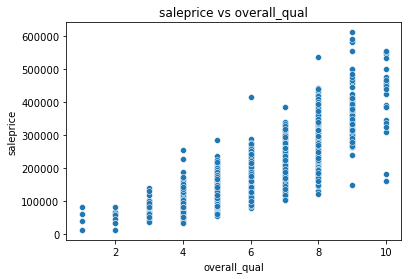

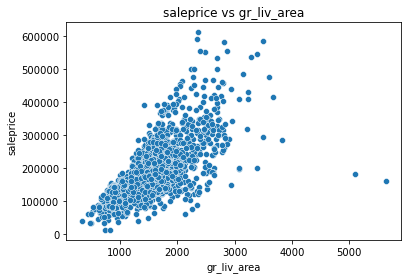

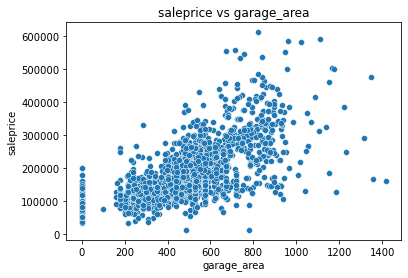

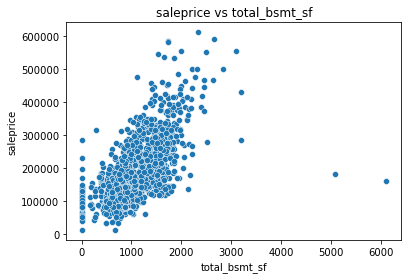

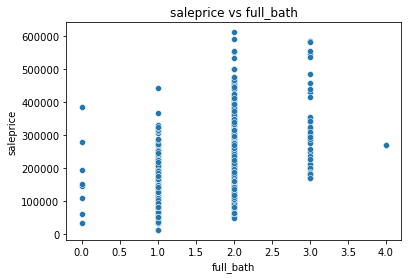

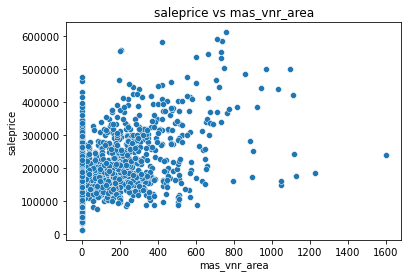

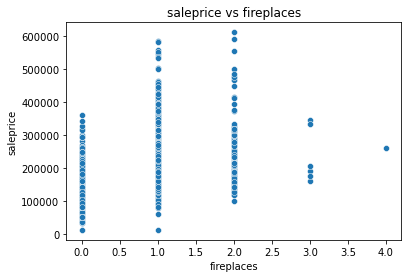

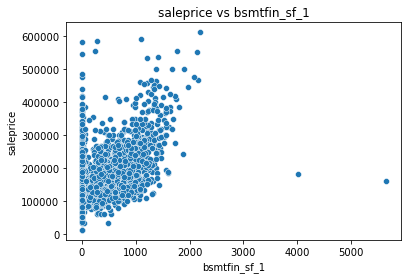

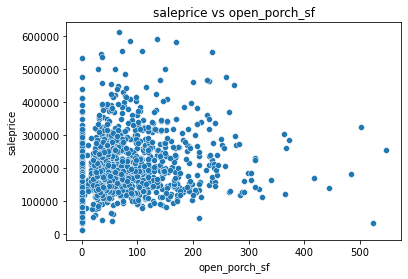

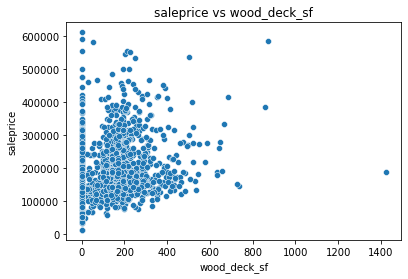

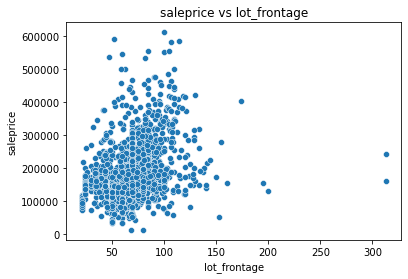

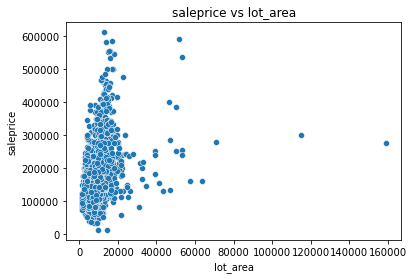

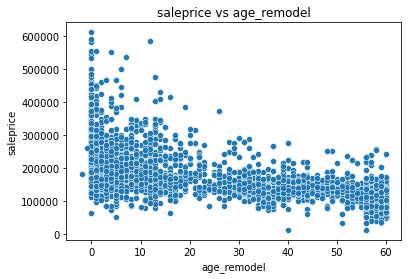

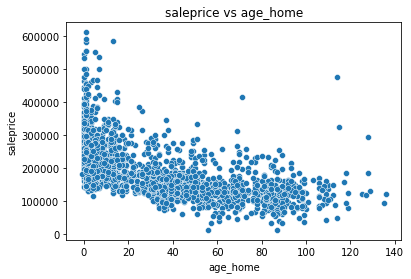

In [27]:
#using scatter graphs for numerical columns to identify outliners
for col in list(train_num_cols.corr()[['saleprice']].sort_values(by = 'saleprice', ascending=False).index):
    if col != 'saleprice':
        plt.ylabel('saleprice')
        plt.xlabel(col)
        plt.title(f'saleprice vs {col}')
        sns.scatterplot(data = train_num_cols, x=col, y='saleprice')
        plt.show()
    else:
        pass

From the scattergraph i have identified some of the outliers and will remove them accordingly.

In [28]:
#set the range of the feature
train = train[train['gr_liv_area'] <=4000]
#to check
train[train['gr_liv_area'] > 4000].count().sum()

0

In [29]:
train = train[train['garage_area'] <= 1400]
train[train['garage_area'] > 1400].count().sum()

0

In [30]:
train = train[train['total_bsmt_sf'] <= 5000]
train[train['total_bsmt_sf'] > 5000].count().sum()

0

In [31]:
train = train[train['mas_vnr_area'] <= 1400]
train[train['mas_vnr_area'] > 1400].count().sum()

0

In [32]:
train = train[train['bsmtfin_sf_1'] <= 3000]
train[train['bsmtfin_sf_1'] > 3000].count().sum()

0

In [33]:
train = train[train['open_porch_sf'] <=500]
train[train['open_porch_sf'] > 500].count().sum()

0

In [34]:
train = train[train['wood_deck_sf'] <= 1000]
train[train['wood_deck_sf'] > 1000].count().sum()

0

In [35]:
train = train[train['lot_frontage'] <= 300]
train[train['lot_frontage'] > 300].count().sum()

0

In [36]:
train = train[train['lot_area'] <= 100000]
train[train['lot_area'] > 100000].count().sum()

0

In [37]:
train = train[train['age_remodel'] >= 0]
train[train['age_remodel'] < 0].count().sum()

0

In [38]:
train = train[train['age_home'] >= 0]
train[train['age_home'] < 0].count().sum()

0

**Comment:** Outliers removed

Let's take a look at the distribution of the numerical features

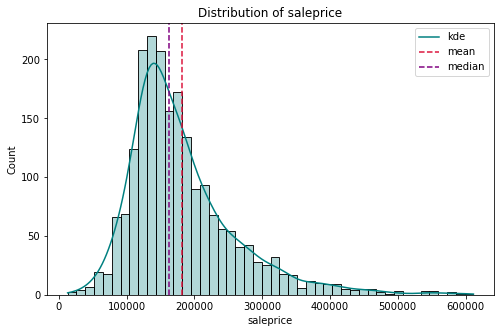

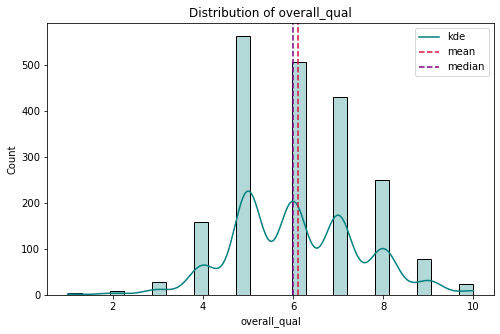

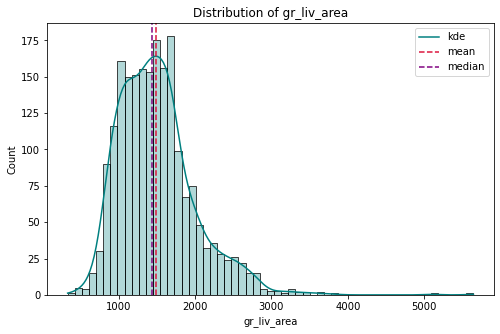

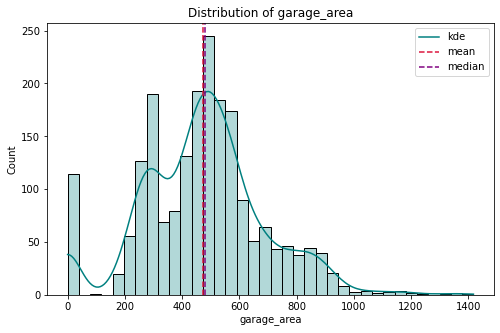

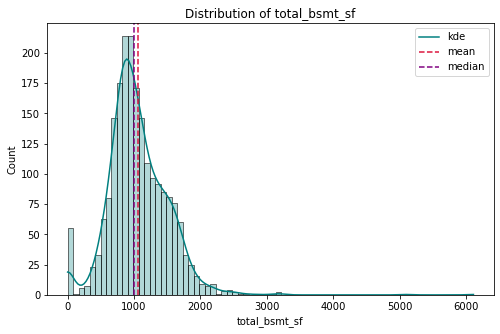

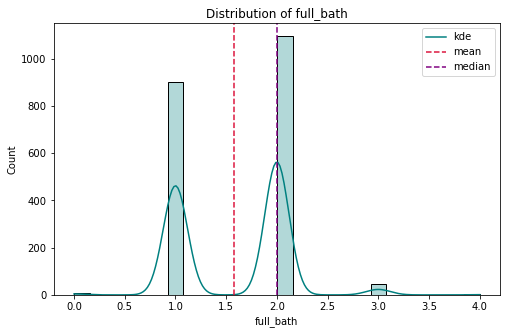

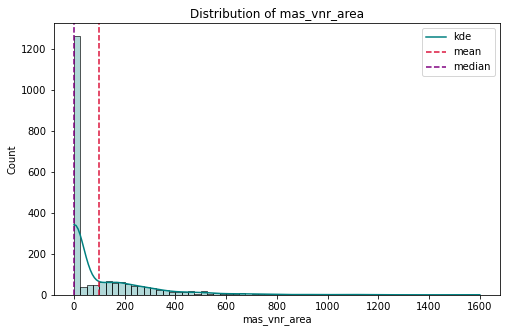

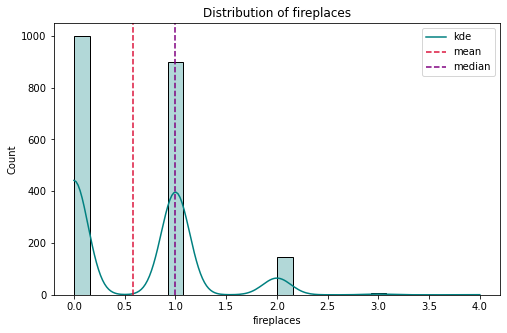

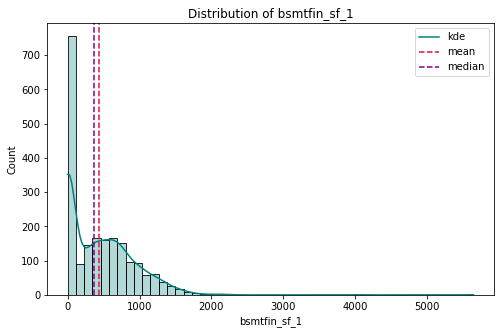

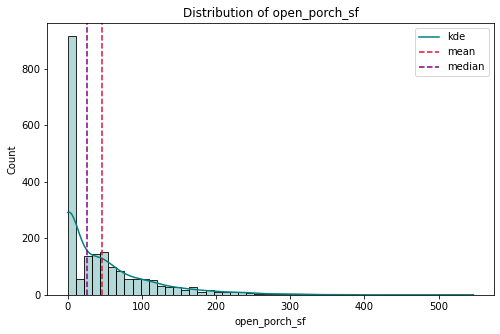

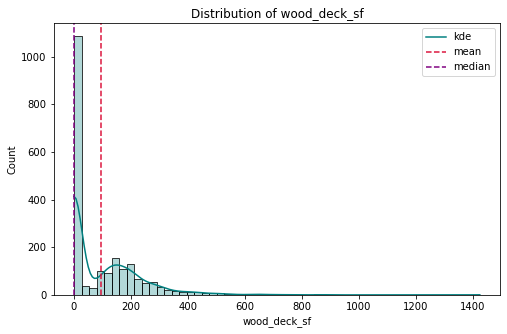

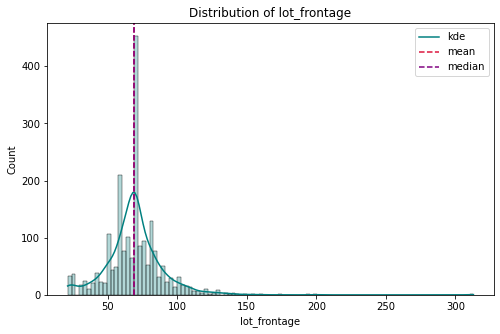

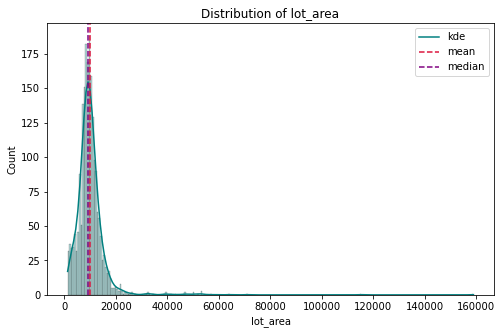

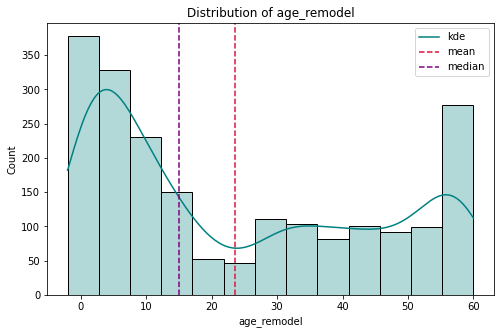

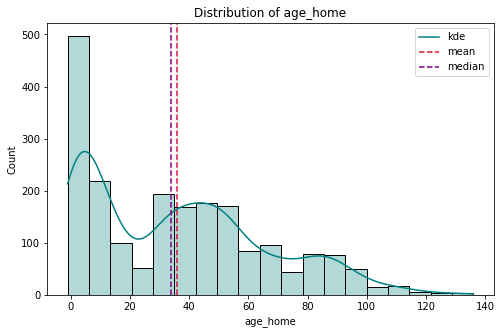

In [39]:
for col in list(train_num_cols.corr()[['saleprice']].sort_values('saleprice', ascending=False).index):
    plt.figure(figsize=(8,5))
    sns.histplot(data=train_num_cols, x=col, kde=True, color = 'teal', alpha = 0.3)
    plt.axvline(x=train[col].mean(), color='crimson', linestyle = 'dashed', label="mean", alpha=1)
    plt.axvline(x=train[col].median(), color='purple', linestyle= 'dashed', label="median", alpha=1)
    plt.title(f'Distribution of {col}')
    plt.legend(['kde','mean', 'median'])
    plt.show()

**Comment:** The distribution for the target 'saleprice' is positively skewed, i will use log transformation to normalise the target and this will help to improve on the linear regression model as shown below.

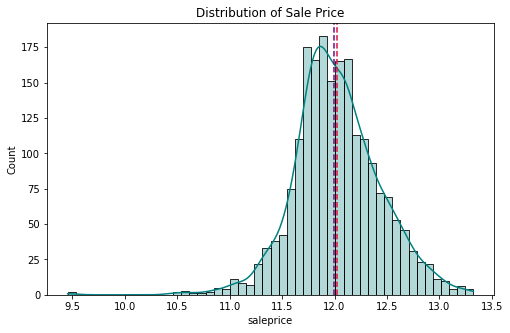

In [40]:
#to normalise the distribution for saleprice
plt.figure(figsize=(8,5))
sns.histplot(data = train_num_cols, x = np.log(train['saleprice']), color = 'teal', kde = True, alpha = 0.3)
plt.axvline(x= np.log(train['saleprice']).mean(), color = 'crimson', linestyle = 'dashed', label = 'mean', alpha = 1)
plt.axvline(x= np.log(train['saleprice']).median(), color = 'purple', linestyle = 'dashed', label = 'mean', alpha = 1)
plt.title('Distribution of Sale Price')
plt.show()

Next, i will examine for **categorical features**

In [41]:
#categorical features for train data set
train_cat_cols = train.select_dtypes(include=['object'])
train_cat_cols.columns.tolist()

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

In [42]:
#categorical features for test data set
test_cat_cols = test.select_dtypes(include=['object'])
test_cat_cols.columns.tolist()

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

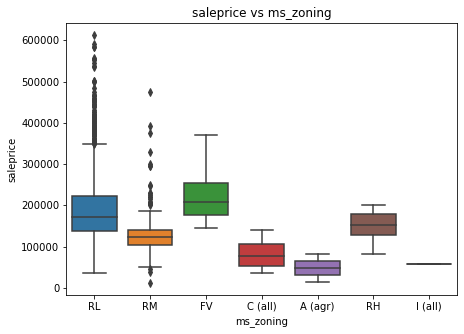

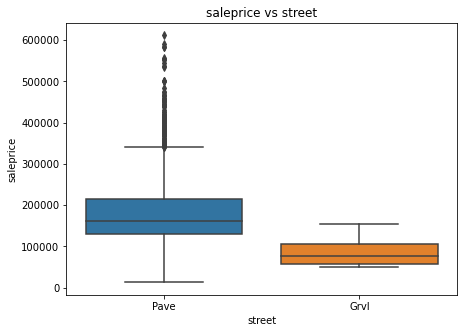

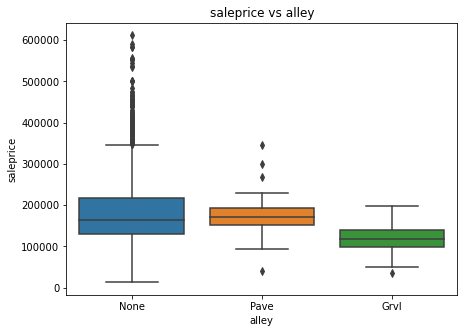

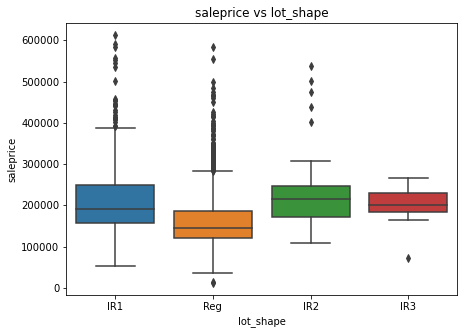

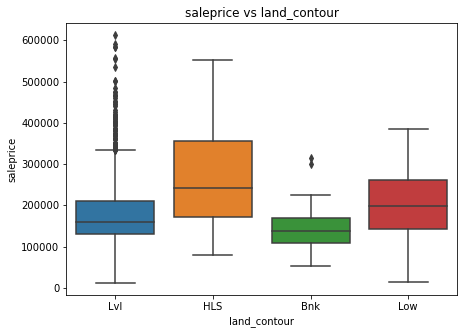

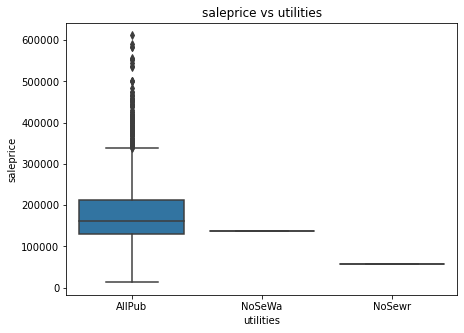

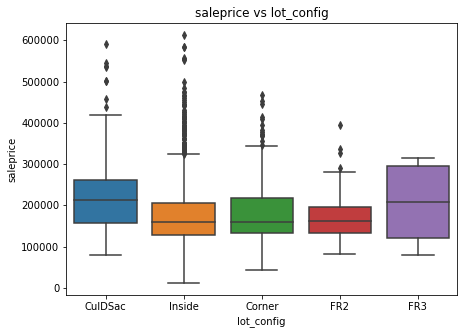

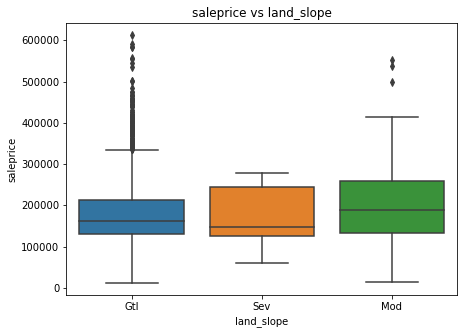

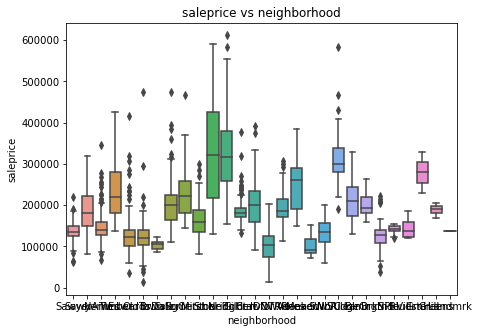

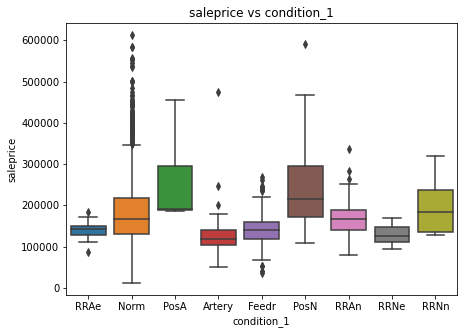

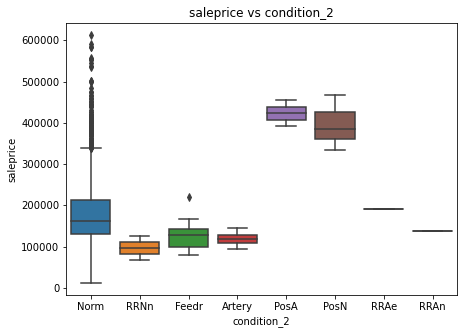

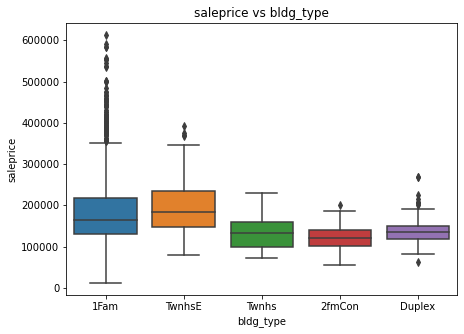

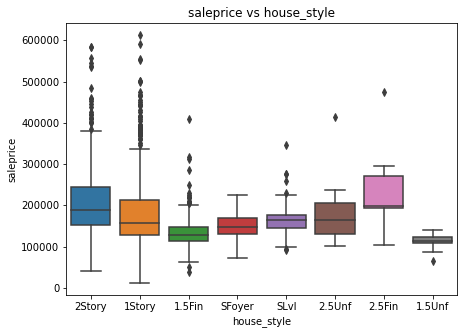

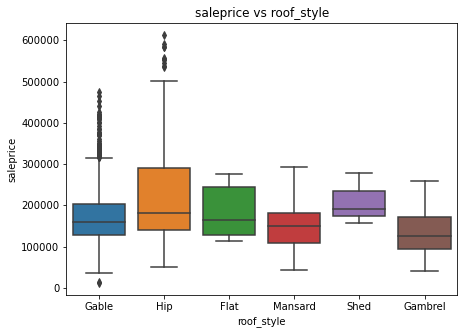

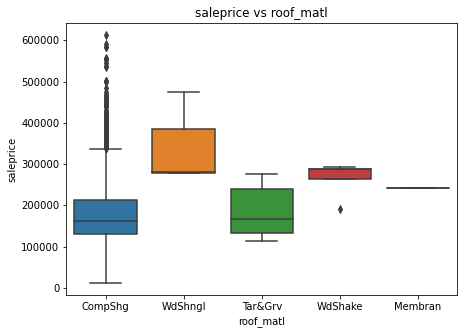

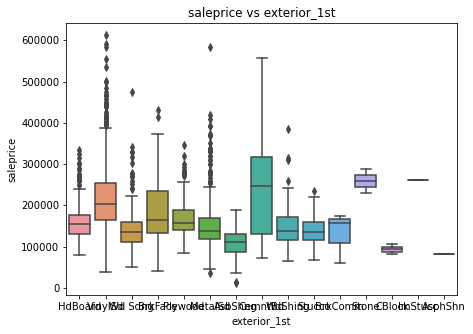

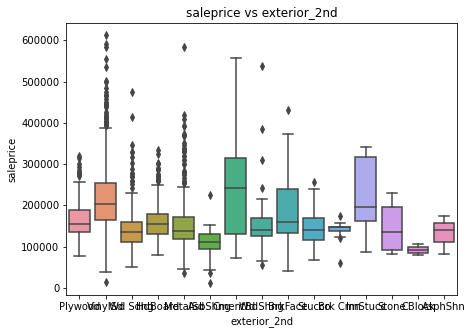

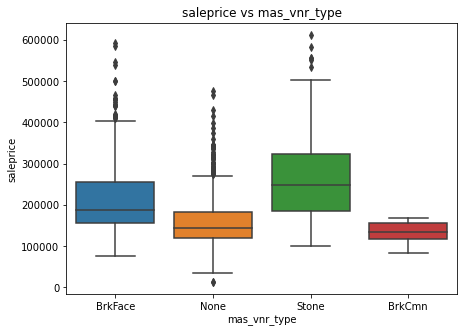

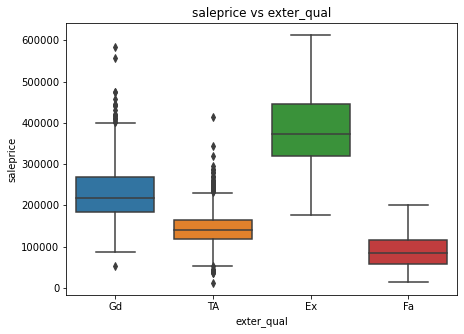

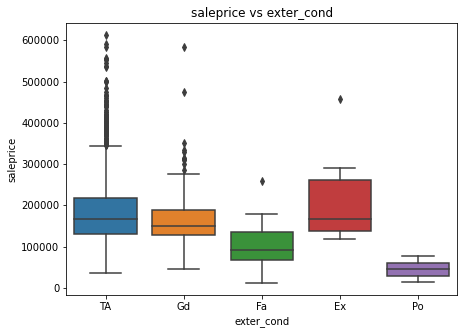

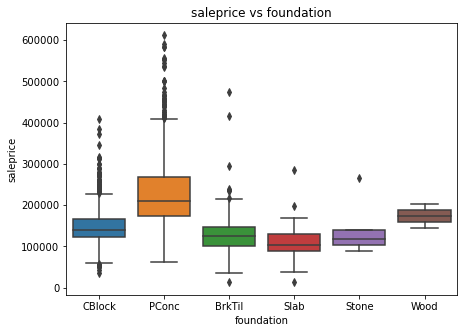

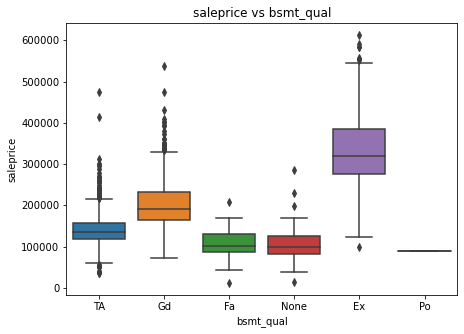

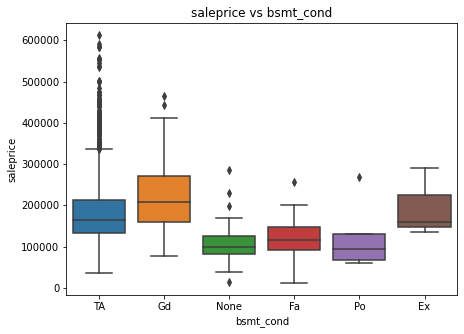

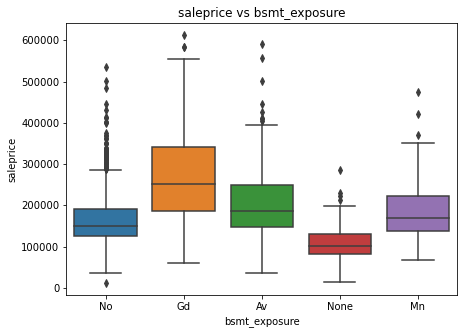

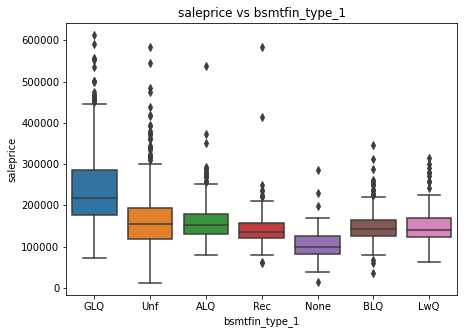

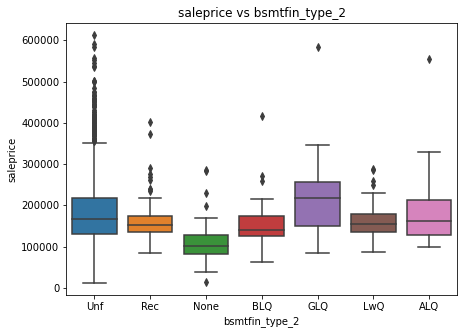

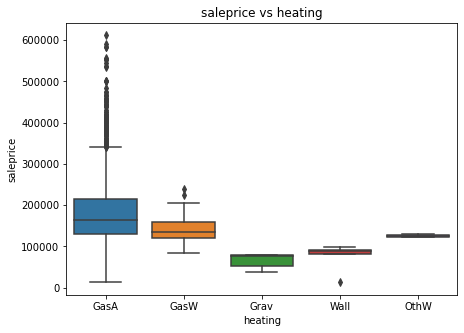

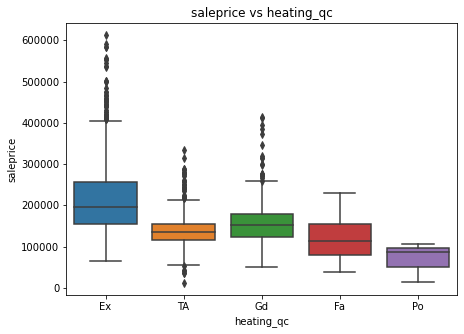

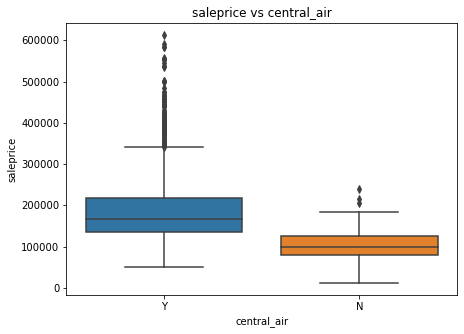

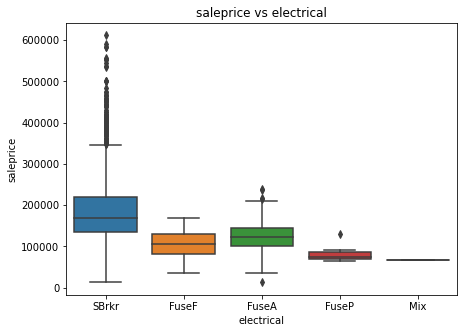

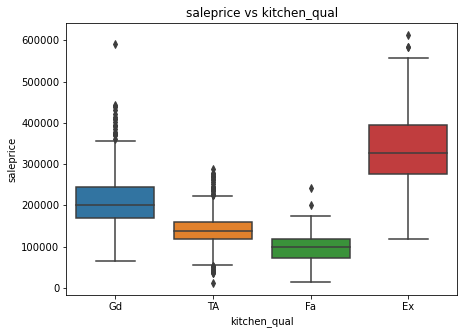

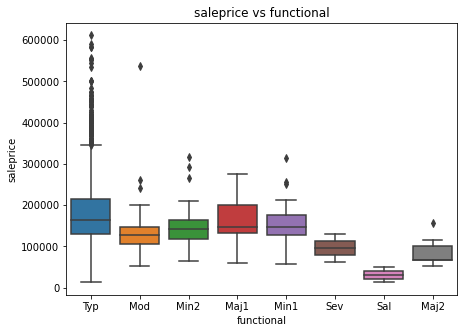

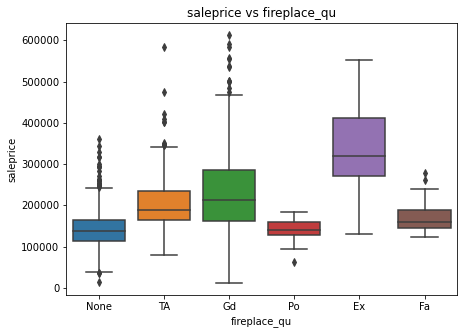

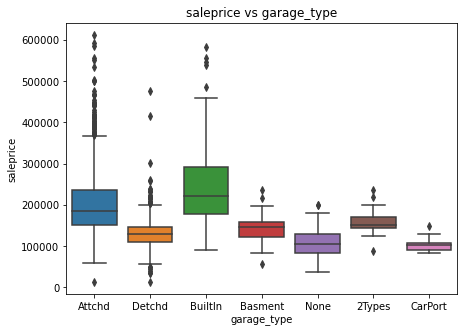

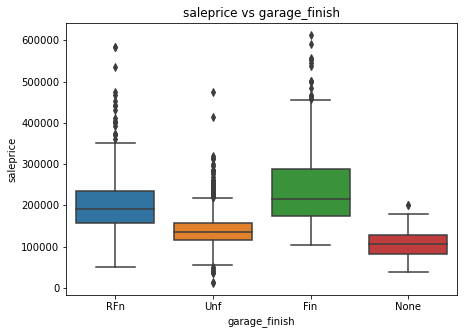

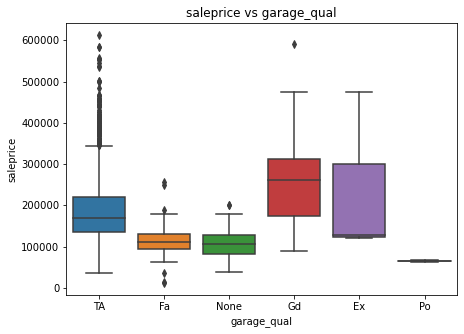

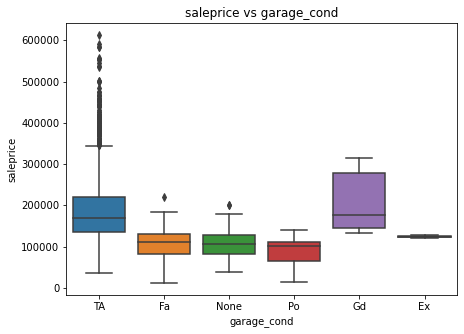

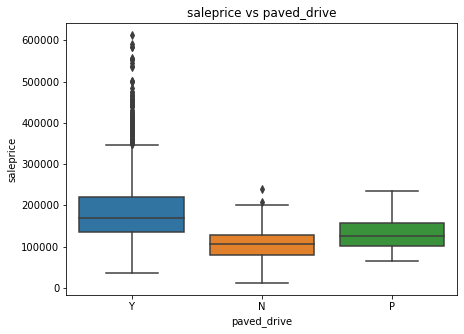

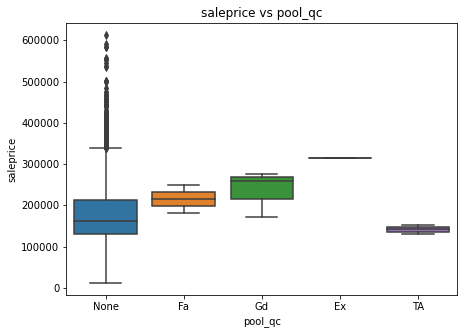

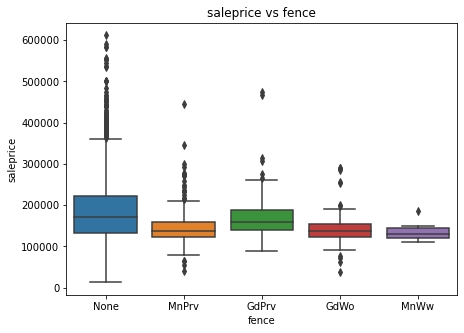

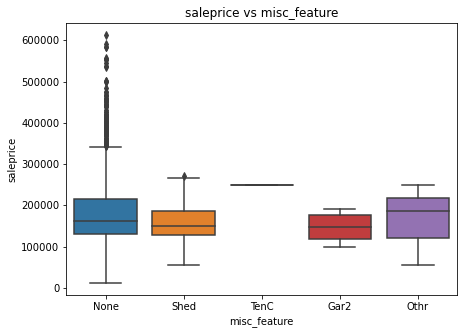

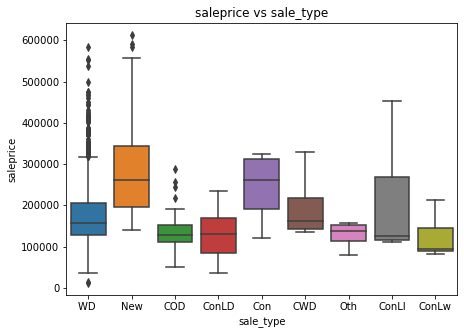

In [43]:
#using boxplot to analyze the relationship for categorical features vs saleprice using
for col in list(train_cat_cols):
    plt.figure(figsize=(7,5))
    sns.boxplot(data = train, x = col, y = 'saleprice')
    plt.title(f'saleprice vs {col}')
    plt.show()

By analyzing on the boxplot, i will remove the feature that has insignificant impact to the saleprice.

**Comment:** <br> 
To drop: 
1. Alley - Despite majority of the houses have no alley, many of the houses are still able to fetch at a higher selling price.
2. Lot Shape - Overlapping without any clear distinction.
2. Utilities - Almost all of the houses have all public utilities, hence will not provide any meaningful information.
3. Lot Config - Overlapping without any clear distinction.
4. Land Slope - Overlapping without any clear distinction.
5. Heating - Majority of the houses using 'GasA' type heating, hence will not provide any meaningful information.
6. Electrical - Majority of the houses using 'SBrkr', hence will not provide any meaningful information.
6. Pool QC -  Majority of the houses has no pool, hence will not provide any meaningful information.
7. Fence - Majority of the houses has no fence, hence will not provide any meaningful information.
8. Misc Feature - Majority of the houses has no miscellaneous feature, hence will not provide any meaningful information.

In [44]:
#drop columns from train data set
train.drop(columns = ['alley',
                      'lot_shape',
                      'utilities',
                      'lot_config',
                      'land_slope',                      
                      'heating',
                      'electrical',
                      'pool_qc',
                      'fence',
                      'misc_feature'], inplace = True)

In [45]:
#drop columns from test data set
test.drop(columns = ['alley',
                      'lot_shape',
                      'utilities',
                      'lot_config',
                      'land_slope',                      
                      'heating',
                      'electrical',
                      'pool_qc',
                      'fence',
                      'misc_feature'], inplace = True)

I will not convert the ordinal features to a numerical scale as they do not significantly improve the model (in terms of R-squared or RMSE), and they are not interval variables (i.e.the intervals are unknown). 

Converting categorical columns into a **one-hot encoded matrix**.

In [46]:
#filter train data set with dtypes = object
train_cat_var = list(train.dtypes[train.dtypes =='object'].index)

In [47]:
#convert to numerical features
train = pd.get_dummies(data=train, columns=train_cat_var,drop_first=True)

In [48]:
train.head()

,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,fireplaces,garage_area,...,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,69.0552,13517,6,289.0,533.0,725.0,1479,2,0,475.0,...,0,1,0,0,0,0,0,0,0,1
1,43.0000,11492,7,132.0,637.0,913.0,2122,2,1,559.0,...,0,1,0,0,0,0,0,0,0,1
2,68.0000,7922,5,0.0,731.0,1057.0,1057,1,0,246.0,...,0,1,0,0,0,0,0,0,0,1
3,73.0000,9802,5,0.0,0.0,384.0,1444,2,0,400.0,...,0,1,0,0,0,0,0,0,0,1
4,82.0000,14235,6,0.0,0.0,676.0,1445,2,0,484.0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
#filter test data set with dtypes = object
test_cat_vars = list(test.dtypes[test.dtypes =='object'].index)

In [50]:
#convert to numerical features
test = pd.get_dummies(data=test, columns=test_cat_vars,drop_first=True)

In [51]:
test.head()

,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,fireplaces,garage_area,...,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,69.000000,9142,6,0.0,0,1020,1928,2,0,440,...,1,0,0,0,0,0,0,0,0,1
1,69.545961,9662,5,0.0,0,1967,1967,2,0,580,...,1,0,0,0,0,0,0,0,0,1
2,58.000000,17104,7,0.0,554,654,1496,2,1,426,...,1,0,0,0,0,0,1,0,0,0
3,60.000000,8520,5,0.0,0,968,968,1,0,480,...,0,0,0,0,0,0,0,0,0,1
4,69.545961,9500,6,247.0,609,1394,1394,1,2,514,...,1,0,0,0,0,0,0,0,0,1


In [52]:
print(f'{train.shape}')
print(f'{test.shape}')

(2040, 205)
(878, 183)


To align the train data set and test data set, i will remove the list of different columns as adding on more columns will create 'noise'. 

In [53]:
train_column_list = list(train.columns)

In [54]:
test_column_list = list(test.columns)

In [55]:
#loop function to remove columns
for c in train_column_list:
    if c != 'saleprice':
        if c not in test_column_list:
            train.drop(columns = c, inplace = True)
        
for c in test_column_list:
    if c not in train_column_list:
        test.drop(columns = c, inplace = True)

In [56]:
print(f'{train.shape}')
print(f'{test.shape}')

(2040, 176)
(878, 175)


**Comment:** Train data set will have 1 addition column which is saleprice, i will delete it later for train test split.

# Model Selection and Evaluation

**Train test split**

In [57]:
#create X and y
X = train.drop(columns = 'saleprice')
y = np.log(train['saleprice'])  #log the saleprice for normal distribution

#verify dimensions
print('X: ', X.shape)
print('y: ', y.shape)

X:  (2040, 175)
y:  (2040,)


In [58]:
#train test split (set test size as 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=123)

In [59]:
#instantiate standard scaler
ss = StandardScaler()
#fit standard scaler to X_train and transform 
X_train_sc = ss.fit_transform(X_train)
#fit standard scaler to X_test and transform
X_test_sc = ss.transform(X_test)

#standardize test set data 
test_sc = ss.fit_transform(test)

***LINEAR Regression***

In [60]:
#instantiate and fit model
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [61]:
print('-----Linear Regression-----')
print(f'Training Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Val Score for train set: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
print(f'Cross Val Score for test set: {cross_val_score(lr, X_test_sc, y_test, cv=5).mean()}')

-----Linear Regression-----
Training Score: 0.9323293646424818
Testing Score: 0.8992334546937923
Cross Val Score for train set: -7.6343218945515e+23
Cross Val Score for test set: -2.0636211267708891e+24


In [62]:
#create a dataframe to show the coefficient
lr_coef = pd.DataFrame(X_train.columns, columns = ['features'])
lr_coef['coefficient'] = lr.coef_
pd.set_option('display.max_rows',None)
lr_coef

,features,coefficient
0,lot_frontage,0.015154
1,lot_area,0.026731
2,overall_qual,0.082747
3,mas_vnr_area,-0.000200
4,bsmtfin_sf_1,0.036696
5,total_bsmt_sf,0.032614
6,gr_liv_area,0.120425
7,full_bath,0.007280
8,fireplaces,0.012483
9,garage_area,0.012757


In [63]:
print(f'The number of features in this model is : {np.sum(lr.coef_ != 0)}.')

The number of features in this model is : 175.


In [64]:
#top 5 features 
lr_coef[lr_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = False).head(5)

,features,coefficient
6,gr_liv_area,0.120425
2,overall_qual,0.082747
17,ms_zoning_RL,0.071359
146,functional_Typ,0.052423
98,exterior_2nd_VinylSd,0.051225


**Comment**: Top 5 features

In [65]:
#bottom 5 features
lr_coef[lr_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = True).head(5)

,features,coefficient
109,exter_cond_Po,-0.035150
69,roof_style_Gable,-0.034833
71,roof_style_Hip,-0.034456
13,age_remodel,-0.033948
141,kitchen_qual_TA,-0.031622


**Comment:** Bottom 5 features

In [66]:
#y intercept
lr.intercept_

12.035401443351757

In [67]:
#generate predictions for testing
lr_test_prediction = lr.predict(X_test_sc)
print(lr_test_prediction)

[11.7932631  11.63594945 12.2172388  11.37210804 11.73955375 12.00149221
 11.80894249 12.02308863 12.56034343 11.75342565 11.6381255  11.43665205
 10.16729984 11.86840957 11.85295344 11.85873445 12.80651996 11.70408255
 11.61989305 11.88491314 11.77591447 12.03694042 12.87902344 12.3337429
 12.3689873  11.74595087 12.3289153  11.81005436 11.92390223 11.41930763
 12.95804686 12.16107926 12.37878791 11.91664479 12.33131169 11.92317469
 12.1894793  12.82045819 12.45703632 12.53549798 12.8897752  11.92892111
 12.58829675 12.24865777 11.95500743 11.76231593 12.1018836  11.84404416
 12.0744544  12.04136606 11.08707429 11.89886339 12.22998271 11.87357286
 11.33373726 12.29192271 12.16291554 12.19664212 12.37784327 12.25899003
 12.03608079 12.13798656 11.943772   12.68023284 12.09471552 12.11997625
 11.75445948 11.21587079 11.62838641 10.96557298 12.28951766 11.86773098
 12.13738915 11.94190637 10.4370993  11.8894898  12.43238289 11.96722145
 12.19842911 12.41428114 12.127167   11.89014082 11.

In [68]:
#inverse of np.log is np.exp (convert back to original value)
y_test_exp = np.exp(y_test)
lr_test_prediction = np.exp(lr_test_prediction)
print(lr_test_prediction)

[132357.66227408 113091.1544737  202245.74597932  86864.78885341
 125436.35180466 162997.83691493 134449.30415073 166556.29288055
 285028.20760938 127188.51651397 113337.51403051  92656.28366365
  26037.67596675 142687.12410769 140498.68981439 141313.26612323
 364586.80775468 121064.96106859 111289.81848055 145061.51022441
 130081.24215917 168879.44854581 392002.47831007 227235.65837818
 235387.24837031 126241.35567434 226141.29817722 134598.87849361
 150829.03077275  91063.07030333 424236.71140471 191200.76110069
 237705.52730536 149738.36024606 226683.87151487 150719.3368049
 196708.71368623 369704.08517142 257052.67824093 278033.80233182
 396239.93410475 151587.92603788 293108.09614516 208700.97641446
 155594.32726564 128324.29985671 180210.98898337 139252.5062617
 175335.12088351 169628.5045122   65321.35525346 147099.33506563
 204839.64065287 143425.76399766  83594.8550992  217928.58888161
 191552.18221239 198122.7605167  237481.08885677 210868.50828483
 168734.33703672 186836.009

In [69]:
#y_train
#generate predictions for training
y_train_exp = np.exp(y_train)
lr_train_prediction = np.exp(lr.predict(X_train_sc))
print(lr_train_prediction)

[146492.35390507 108859.88808573 184328.54939228 ... 115299.28618168
 290641.76385937 240803.45131537]


In [70]:
print('---Training---')
#MSE
print(f'MSE: {mean_squared_error(y_train_exp, lr_train_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_exp, lr_train_prediction))}')
#R^2
print(f'R^2: {r2_score(y_train_exp, lr_train_prediction)}')
print('')
print('---Testing---')
#MSE
print(f'MSE: {mean_squared_error(y_test_exp, lr_test_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, lr_test_prediction))}')
#R^2
print(f'R^2: {r2_score(y_test_exp, lr_test_prediction)}')

---Training---
MSE: 329767919.9880659
RMSE: 18159.51320900607
R^2: 0.9484314823564537

---Testing---
MSE: 396400967.5826778
RMSE: 19909.820882737185
R^2: 0.9333782650028266


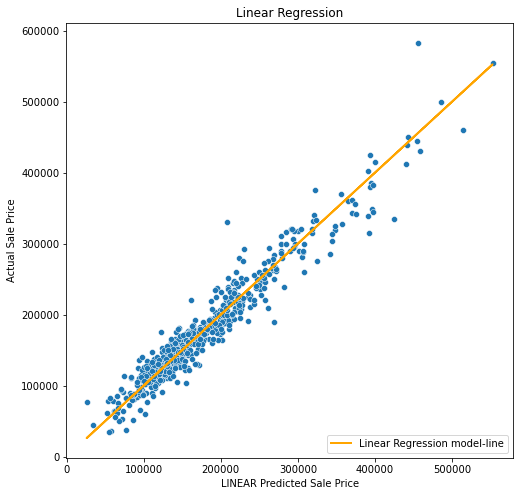

In [71]:
#plot the graph
plt.subplots(figsize=(8,8))
sns.scatterplot( x= lr_test_prediction, y = y_test_exp)
plt.plot(lr_test_prediction, lr_test_prediction, color = "orange", linewidth=2, label="Linear Regression model-line")
plt.xlabel("LINEAR Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Linear Regression")
plt.legend(loc="lower right");

**Comment:** The data and the regression line is pretty close till 300k

***RIDGE***

In [72]:
ridge_alphas = np.logspace(0, 5, 100)

ridge = RidgeCV(alphas= ridge_alphas, cv=5)
ridge.fit(X_train_sc, y_train)

print (ridge.alpha_)

46.4158883361278


In [73]:
print(f'-----Ridge-----')
print(f'Training score : {ridge.score(X_train_sc, y_train)}')
print(f'Testing score: {ridge.score(X_test_sc, y_test)}')
print(f'Cross Val Score for train set: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')
print(f'Cross Val Score for test set: {cross_val_score(ridge, X_test_sc, y_test, cv=5).mean()}')

-----Ridge-----
Training score : 0.930722158337355
Testing score: 0.9008013015441169
Cross Val Score for train set: 0.891522733895693
Cross Val Score for test set: 0.8907727854592192


In [74]:
#create a dataframe to show the coefficient
ridge_coef = pd.DataFrame(X_train.columns, columns = ['features'])
ridge_coef['coefficient'] = ridge.coef_
pd.set_option('display.max_rows',None)
ridge_coef

,features,coefficient
0,lot_frontage,0.015792
1,lot_area,0.024665
2,overall_qual,0.078348
3,mas_vnr_area,0.002493
4,bsmtfin_sf_1,0.033920
5,total_bsmt_sf,0.037783
6,gr_liv_area,0.102725
7,full_bath,0.011534
8,fireplaces,0.015150
9,garage_area,0.015053


In [75]:
print(f'The number of features in this model is : {np.sum(ridge.coef_ != 0)}.')

The number of features in this model is : 175.


In [76]:
#top 5 features
ridge_coef[ridge_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = False).head(5)

,features,coefficient
6,gr_liv_area,0.102725
2,overall_qual,0.078348
5,total_bsmt_sf,0.037783
146,functional_Typ,0.036306
4,bsmtfin_sf_1,0.033920


**Comment:** Top 5 features

In [77]:
#bottom 5 features
ridge_coef[ridge_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = True).head(5)

,features,coefficient
109,exter_cond_Po,-0.034804
13,age_remodel,-0.034468
141,kitchen_qual_TA,-0.026515
140,kitchen_qual_Gd,-0.022938
12,age_home,-0.022211


**Comment:** Bottom 5 features

In [78]:
#y intercept
ridge.intercept_

12.035401443351757

In [79]:
#generate predictions for testing
ridge_test_prediction = np.exp(ridge.predict(X_test_sc))

In [80]:
#generate predictions for training
ridge_train_prediction = np.exp(ridge.predict(X_train_sc))

In [81]:
print('---Training---')
#MSE
print(f'MSE: {mean_squared_error(y_train_exp, ridge_train_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_exp, ridge_train_prediction))}')
#R^2
print(f'R^2: {r2_score(y_train_exp, ridge_train_prediction)}')
print()
print('---Testing---')
#MSE
print(f'MSE: {mean_squared_error(y_test_exp, ridge_test_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, ridge_test_prediction))}')
#R^2
print(f'R^2: {r2_score(y_test_exp, ridge_test_prediction)}')

---Training---
MSE: 335180313.2554112
RMSE: 18307.930337845708
R^2: 0.9475851019756362

---Testing---
MSE: 370600667.01114166
RMSE: 19250.991325413393
R^2: 0.9377144319854811


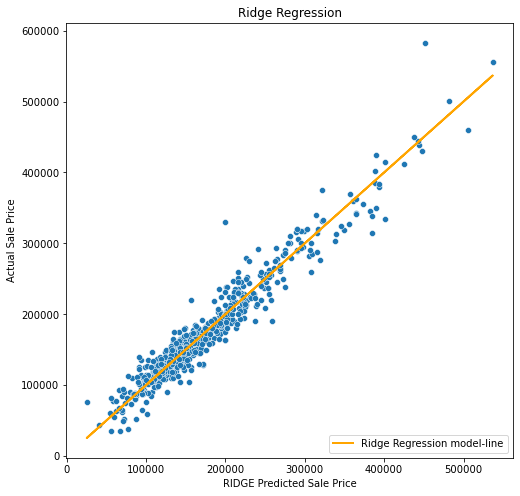

In [82]:
#plot graph
plt.subplots(figsize=(8,8))
sns.scatterplot( x= ridge_test_prediction, y = y_test_exp)
plt.plot(ridge_test_prediction, ridge_test_prediction, color = "orange", linewidth=2, label="Ridge Regression model-line")
plt.xlabel("RIDGE Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Ridge Regression")
plt.legend(loc="lower right");

**Comment:** The data and regression line seems to be a little bit better than linear.

**LASSO**

In [83]:
lasso_model = LassoCV(n_alphas=500, cv=5, verbose=1)
lasso_model.fit(X_train_sc, y_train)

print (lasso_model.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000358390901655561


In [84]:
lasso = Lasso(alpha=lasso_model.alpha_)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=0.000358390901655561)

In [85]:
print('-----Lasso-----')
print(f'Training score: {lasso.score(X_train_sc, y_train)}')
print(f'Testing score: {lasso.score(X_test_sc, y_test)}')
print(f'Cross Val Score for train set: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
print(f'Cross Val Score for test set: {cross_val_score(lasso, X_test_sc, y_test, cv=5).mean()}')

-----Lasso-----
Training score: 0.9312918438478288
Testing score: 0.9016913053698389
Cross Val Score for train set: 0.8925787783634871
Cross Val Score for test set: 0.8801890126300635


In [86]:
##create a dataframe to show the coefficient
lasso_coef = pd.DataFrame(X_train.columns, columns = ['features'])
lasso_coef['coefficient'] = lasso.coef_
pd.set_option('display.max_rows',None)
lasso_coef

,features,coefficient
0,lot_frontage,0.015351
1,lot_area,0.025481
2,overall_qual,0.086548
3,mas_vnr_area,0.000089
4,bsmtfin_sf_1,0.036086
5,total_bsmt_sf,0.032670
6,gr_liv_area,0.120101
7,full_bath,0.006133
8,fireplaces,0.012935
9,garage_area,0.012882


In [87]:
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The number of features in this model is : 152.


**Comment:** Number of features reduced further with lasso.

In [88]:
#top 5
lasso_coef[lasso_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = False).head(5)

,features,coefficient
6,gr_liv_area,0.120101
2,overall_qual,0.086548
146,functional_Typ,0.045651
4,bsmtfin_sf_1,0.036086
17,ms_zoning_RL,0.033875


**Comment:** Top 5 features

In [89]:
#bottom 5
lasso_coef[lasso_coef['coefficient'] !=0].sort_values(by = 'coefficient', ascending = True).head(5)

,features,coefficient
13,age_remodel,-0.035453
109,exter_cond_Po,-0.035082
141,kitchen_qual_TA,-0.028837
12,age_home,-0.027582
140,kitchen_qual_Gd,-0.026701


**Comment:** Bottom 5 features

In [90]:
#y intercept
lasso.intercept_

12.035401443351757

In [91]:
#generate predictions for testing
lasso_test_prediction = np.exp(lasso.predict(X_test_sc))

In [92]:
#generate predictions for training
lasso_train_prediction = np.exp(lasso.predict(X_train_sc))

In [93]:
print('---Training---')
#MSE
print(f'MSE: {mean_squared_error(y_train_exp, lasso_train_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_exp, lasso_train_prediction))}')
#R^2
print(f'R^2: {r2_score(y_train_exp, lasso_train_prediction)}')
print()
print('---Testing---')
#MSE
print(f'MSE: {mean_squared_error(y_test_exp, lasso_test_prediction)}')
#RMSE
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, lasso_test_prediction))}')
#R^2
print(f'R^2: {r2_score(y_test_exp, lasso_test_prediction)}')

---Training---
MSE: 333142245.79641354
RMSE: 18252.184685577053
R^2: 0.947903811320444

---Testing---
MSE: 383148016.1674913
RMSE: 19574.167061908185
R^2: 0.9356056425556546


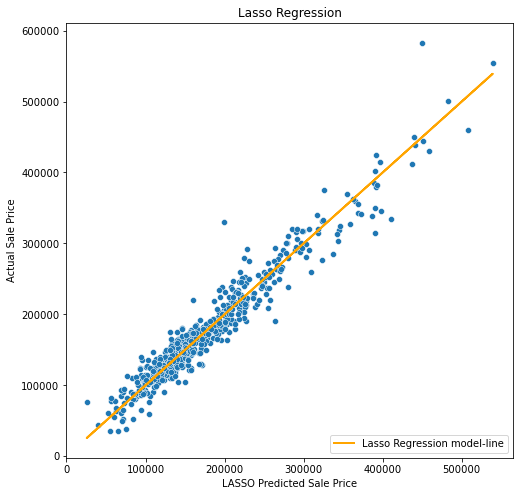

In [94]:
plt.subplots(figsize=(8,8))
sns.scatterplot( x= lasso_test_prediction, y = y_test_exp)
plt.plot(lasso_test_prediction, lasso_test_prediction, color = "orange", linewidth=2, label="Lasso Regression model-line")
plt.xlabel("LASSO Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Lasso Regression")
plt.legend(loc="lower right");

In [95]:
print('----Testing Set----')
print()
print('======Linear=====')
print(f'MSE: {mean_squared_error(y_test_exp, lr_test_prediction)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, lr_test_prediction))}')
print(f'R^2: {r2_score(y_test_exp, lr_test_prediction)}')
print('======Ridge======')
print(f'MSE: {mean_squared_error(y_test_exp, ridge_test_prediction)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, ridge_test_prediction))}')
print(f'R^2: {r2_score(y_test_exp, ridge_test_prediction)}')
print('======Lasso======')
print(f'MSE: {mean_squared_error(y_test_exp, lasso_test_prediction)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, lasso_test_prediction))}')
print(f'R^2: {r2_score(y_test_exp, lasso_test_prediction)}')
print('======Baseline======')
print(f'MSE: {mean_squared_error(y_test_exp, [np.mean(np.exp(y_train))] * len(y_test_exp))}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_exp, [np.mean(np.exp(y_train))] * len(y_test_exp)))}')
print(f'R^2: {r2_score(y_test_exp, [np.mean(np.exp(y_train))] * len(y_test_exp))}')

----Testing Set----

======Linear=====
MSE: 396400967.5826778
RMSE: 19909.820882737185
R^2: 0.9333782650028266
======Ridge======
MSE: 370600667.01114166
RMSE: 19250.991325413393
R^2: 0.9377144319854811
======Lasso======
MSE: 383148016.1674913
RMSE: 19574.167061908185
R^2: 0.9356056425556546
======Baseline======
MSE: 5996186416.610477
RMSE: 77435.04643641971
R^2: -0.007758242562198037


**Comment:** <br> 
- Using the average of y_train as the baseline, R2 and RMSE score is the worst compared to the 3 models. 
- The RMSE tells us how well a regression model can predict the value of the dependent variable in absolute terms while R2 tells us how well a model can predict the value of the dependent variable in percentage terms
- Ridge and Lasso performed better than Linear 
- Ridge has the best RMSE and R2. 
- However, i will choose Lasso as both Lasso and Ridge scores are pretty close.
- Lasso can set coefficients to zero for those variables that are irrelevant.
- This will further reduce features and make the model simpler. 

Limitation of Lasso:
- If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant.
- If there are two or more highly correlated variables then LASSO regression select one of them randomly which is not good for the interpretation of data

**Residuals plot and distribution of residuals**

In [96]:
resid = y_test_exp - lasso_test_prediction

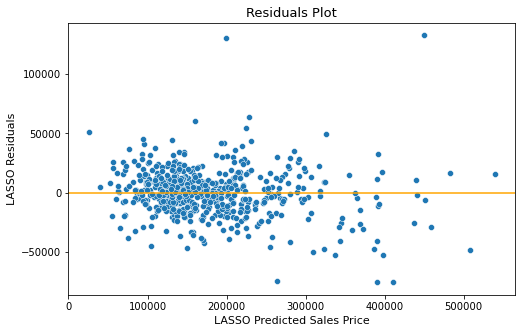

In [97]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = lasso_test_prediction, y = resid)
plt.axhline(0, color = 'orange')
plt.title('Residuals Plot', fontdict = {'fontsize':13})
plt.xlabel('LASSO Predicted Sales Price', fontdict = {'fontsize':11})
plt.ylabel('LASSO Residuals', fontdict = {'fontsize':11});

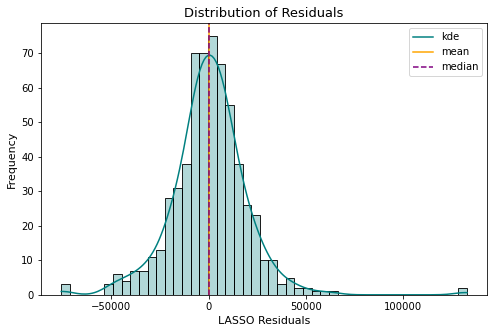

In [98]:
plt.figure(figsize=(8,5))
sns.histplot(data = resid, x = resid, color = 'teal', kde = True, alpha = 0.3)
plt.axvline(x=resid.mean(), color='orange', label="mean", alpha=1)
plt.axvline(x=resid.median(), color='purple', linestyle= 'dashed', label="median", alpha=1)
plt.legend(['kde','mean', 'median'])
plt.title('Distribution of Residuals', fontdict = {'fontsize':13})
plt.xlabel('LASSO Residuals', fontdict = {'fontsize':11})
plt.ylabel('Frequency', fontdict = {'fontsize':11});

**Comment:** Residuals plot follows a normal distribution which makes the lasso model valid.

**Submission to Kaggle**

In [99]:
y_pred = np.exp(lasso_model.predict(test_sc))

In [100]:
submission = pd.DataFrame(y_pred, columns=['saleprice'])
submission['id'] = test_id['id']
submission = submission[['id', 'saleprice']]

In [101]:
submission.head()

,id,saleprice
0,2658,91625.214281
1,2718,169657.110329
2,2414,216599.858169
3,1989,111390.821943
4,625,170576.614870


In [102]:
submission['saleprice'].mean()

182032.28077745257

In [103]:
submission.to_csv('../datasets/Lasso_final.csv', index=False)

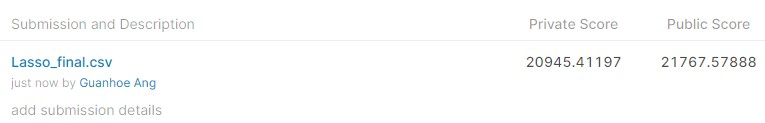

## Conclusions 

1. LASSO RMSE and R2 score is close to RIDGE, i will select LASSO model to predict the sale price as LASSO will further reduce the irrelevant features.
2. LASSO model will perform best when having to predict housing within the range of 100k to 300k
3. To fetch a better sale price, we will need to maintain/improve features that have high positive and negative coefficients. For example, in LASSO, 1 unit increase in gr_liv_area, saleprice will increase by 12%.
4. I believe the model is quite robust and able to predict sale price or as a guide for property evaluators in Ames,IA.

## Recommendations

To collect more data that will affect the saleprice:
1. Distance to amenities.
2. Crime rate / accident around the neighbourhood. 